In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
#loading all of the import libraries that are needed within project


In [2]:
img=image.load_img("Training data/Cook/1.jpg") #loading an image in img variable

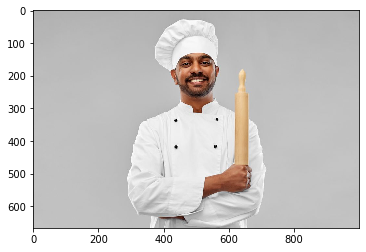

In [3]:
plt.imshow(img) #showing an image

In [4]:
cv2.imread("Training data/Cook/7.jpg").shape #used  for reading image dimensions

(1300, 1300, 3)

In [5]:
train=ImageDataGenerator(rescale=1/255)  #Original images are in RGB coefficients in which we have 0 to 255 values 
Validation=ImageDataGenerator(rescale=1/255) #0 to 255 is difficult to process for neural networks that's why we multiply values with rescale for lower values

In [6]:
train_dataset=train.flow_from_directory('Training data/',target_size=(200,200),batch_size=50,class_mode='categorical')

validation_dataset=Validation.flow_from_directory('Validation data/',target_size=(200,200),batch_size=50,class_mode='categorical')

Found 424 images belonging to 3 classes.
Found 63 images belonging to 3 classes.


In [7]:
train_dataset.class_indices

{'Cook': 0, 'Doctor': 1, 'FireFighter': 2}

In [20]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [23]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                tf.keras.layers.MaxPool2D(2,2),
                                 
                                tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                tf.keras.layers.MaxPool2D(2,2),
                                 
                                 tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                tf.keras.layers.MaxPool2D(2,2),
                                 
                                 
                                 tf.keras.layers.Flatten(),
                                 
                                 tf.keras.layers.Dense(512,activation='relu'),
                                 tf.keras.layers.Dense(1,activation='softmax'),
                                
                                ])

In [26]:
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(lr=0.001),
             metrics=['accuracy'])

In [27]:
model_fit= model.fit(train_dataset,
                    steps_per_epoch=8,
                    epochs=30,
                     validation_data=validation_dataset)

Epoch 1/30
4/8 [==============>...............] - ETA: 9s - loss: 1.7468 - accuracy: 0.6235 

C:\Users\DELL\anaconda3\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


8/8 [==============================] - 27s 3s/step - loss: 1.7195 - accuracy: 0.6192 - val_loss: 0.8926 - val_accuracy: 0.7725
Epoch 2/30
8/8 [==============================] - 23s 3s/step - loss: 1.0565 - accuracy: 0.7100 - val_loss: 0.7130 - val_accuracy: 0.8360
Epoch 3/30
8/8 [==============================] - 20s 2s/step - loss: 0.6926 - accuracy: 0.8096 - val_loss: 0.4271 - val_accuracy: 0.8889
Epoch 4/30
8/8 [==============================] - 21s 3s/step - loss: 0.7062 - accuracy: 0.8066 - val_loss: 0.4270 - val_accuracy: 0.8889
Epoch 5/30
8/8 [==============================] - 20s 2s/step - loss: 0.5250 - accuracy: 0.8718 - val_loss: 0.3674 - val_accuracy: 0.9259
Epoch 6/30
8/8 [==============================] - 20s 2s/step - loss: 0.4582 - accuracy: 0.8803 - val_loss: 0.5077 - val_accuracy: 0.8519
Epoch 7/30
8/8 [==============================] - 21s 3s/step - loss: 0.4542 - accuracy: 0.8779 - val_loss: 0.6485 - val_accuracy: 0.7619
Epoch 8/30
8/8 [=============================

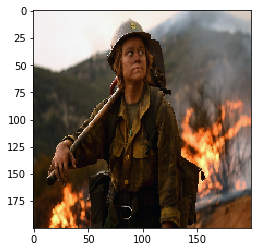

firefighter


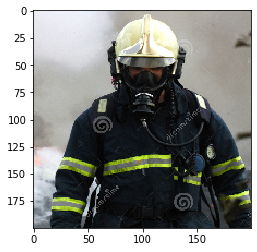

firefighter


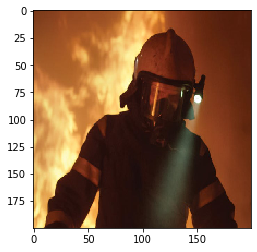

firefighter


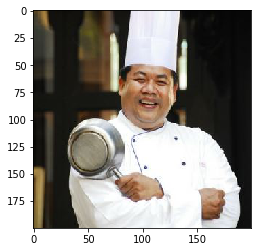

cook


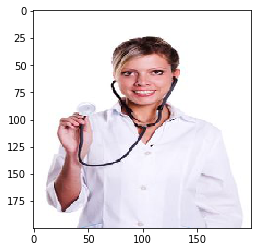

Doctor


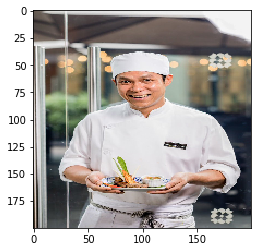

cook


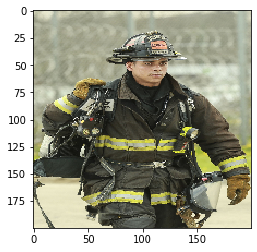

firefighter


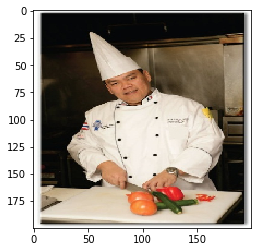

cook


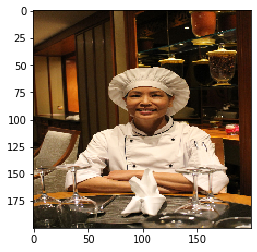

cook


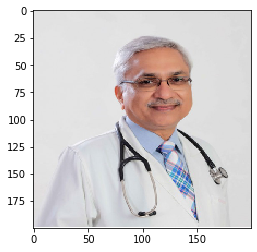

Doctor


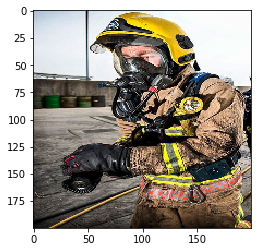

firefighter


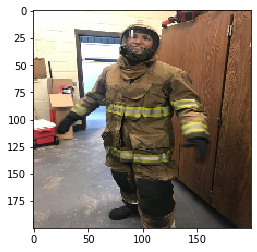

firefighter


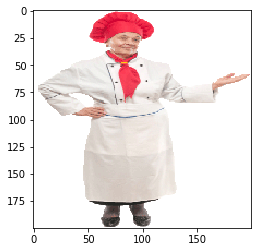

Doctor


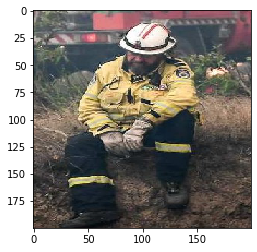

firefighter


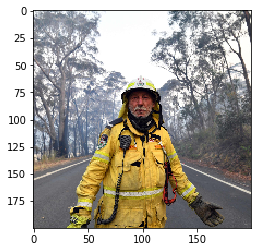

firefighter


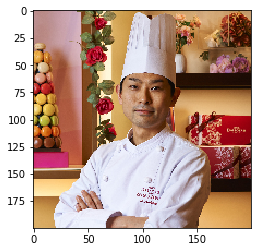

firefighter


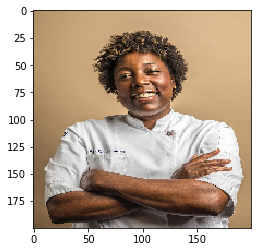

Doctor


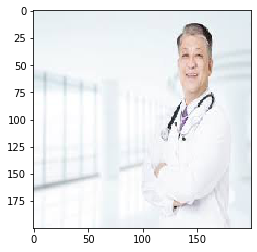

Doctor


In [28]:
dir_path='Testing data/all'
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X=image.img_to_array(img)
    X=np.expand_dims(X, axis= 0)
    images=np.vstack([X])
    val=model.predict(images)
    if val[0][0]==1:
        print("cook")
    elif val[0][1]==1:
        print("Doctor")
    else:
        print("firefighter")

   